In [16]:
import pandas as pd
import numpy as np

In [17]:
pip install deweydatapy@git+https://github.com/Dewey-Data/deweydatapy

  Cloning https://github.com/Dewey-Data/deweydatapy to /private/var/folders/hz/68p8ds5x55g3yvtj3p_5h5wc0000gn/T/pip-install-ooftuj5q/deweydatapy_0857ed3041a64adebb6a8c8981ff178d
  Running command git clone --filter=blob:none --quiet https://github.com/Dewey-Data/deweydatapy /private/var/folders/hz/68p8ds5x55g3yvtj3p_5h5wc0000gn/T/pip-install-ooftuj5q/deweydatapy_0857ed3041a64adebb6a8c8981ff178d
  Resolved https://github.com/Dewey-Data/deweydatapy to commit e2fbca493cb920b43d7631deaf70e5819e4f8020
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [18]:
import deweydatapy as ddp

API_KEY = 'daJIcOz1.fxoxSCGQLLagbtYFmmFkqb9KmwZ5ezJvyFc2tjM5Q9oWxWuUc1vCupCM'
PRODUCT_API_PATH = 'https://app.deweydata.io/external-api/v3/products/b91bcce8-9c2e-4d56-8ee0-19f24837738b/files'

meta = ddp.get_meta(API_KEY, PRODUCT_API_PATH, print_meta = True);

print(meta)

files_df = ddp.get_file_list(API_KEY, PRODUCT_API_PATH,
                             print_info = True);

print(files_df)

# ddp.download_files(files_df, "/files", skip_exists = True)

sample_df = ddp.read_sample(files_df['link'][0], nrows = 5)

print(sample_df)

 
Metadata summary ------------------------------------------------
Total number of files: 515
Total files size (MB): 94,444.18
Date aggregation: MONTH
Date partition column: SCRAPED_TIMESTAMP
Data min available date: 2014-01-01
Data max available date: 2025-01-01
-----------------------------------------------------------------
 
{'total_files': 515, 'total_partitions': 133, 'partition_type': 'DATE', 'partition_column': 'SCRAPED_TIMESTAMP', 'partition_aggregation': 'MONTH', 'min_partition_key': '2014-01-01', 'max_partition_key': '2025-01-01', 'total_size_MB': 94444.179155}
Files information collection completed.
 
Files information summary ---------------------------------------
Total number of pages: 2
Total number of files: 515
Total files size (MB): 94,444.18
Average single file size (MB): 192.26
Date partition column: SCRAPED_TIMESTAMP
Expires at: 2025-04-12T09:49:31.430Z
-----------------------------------------------------------------
     index  page                            

In [19]:
import gzip
import os
import sys
from io import BytesIO

import pandas as pd
import requests
from datetime import datetime

In [24]:
files_df['partition_key'][506]

'2024-12-01'

In [60]:
filtered_dfs = []  # List to store filtered DataFrames

# Slice to only include files 507 to 515 (assuming the index starts at 0)
subset_df = files_df.iloc[507:516]

for i, row in subset_df.iterrows():
    print(f"Processing file {i}/{len(files_df)}: {row['file_name']}")

    # Download the file
    response = requests.get(row["link"])
    if response.status_code != 200:
        print(f"Failed to download file {row['file_name']}")
        continue  # Skip if download fails

    # Read into DataFrame
    df = pd.read_csv(BytesIO(response.content), compression="gzip")

    # Optional: Add filtering logic here if needed
    filtered_dfs.append(df)

# Combine all filtered DataFrames (optional)
if filtered_dfs:
    rental_df = pd.concat(filtered_dfs, ignore_index=True)
    print("Most Recent Month:", rental_df.shape)
else:
    print("No data.")

Processing file 507/515: Residential_Rental_Data_United_States-7-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 508/515: Residential_Rental_Data_United_States-8-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 509/515: Residential_Rental_Data_United_States-9-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 510/515: Residential_Rental_Data_United_States-10-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 511/515: Residential_Rental_Data_United_States-11-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 512/515: Residential_Rental_Data_United_States-12-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 513/515: Residential_Rental_Data_United_States-13-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Processing file 514/515: Residential_Rental_Data_United_States-14-SCRAPED_TIMESTAMP-2025-01-01.csv.gz
Most Recent Month: (3989288, 30)


In [119]:
rental_df.to_csv('rental_data.csv', index=False)

In [61]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989288 entries, 0 to 3989287
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   SCRAPED_TIMESTAMP    object 
 2   STATE                object 
 3   CITY                 object 
 4   NEIGHBORHOOD         object 
 5   ZIP                  float64
 6   ADDRESS              object 
 7   COMPANY              object 
 8   BUILDING_TYPE        object 
 9   BEDS                 float64
 10  BATHS                float64
 11  SQFT                 float64
 12  RENT_PRICE           float64
 13  GRANITE              object 
 14  STAINLESS            object 
 15  POOL                 object 
 16  GYM                  object 
 17  DOORMAN              object 
 18  FURNISHED            object 
 19  LAUNDRY              object 
 20  GARAGE               object 
 21  GARAGE_COUNT         float64
 22  CLUBHOUSE            object 
 23  LATITUDE             float64
 24

In [ ]:
# Columns that are more useful for recommendation
relevant_cols = [
    "BUILDING_TYPE",
    "BEDS", "BATHS", "SQFT", "RENT_PRICE",
    "GRANITE", "STAINLESS", "POOL", "GYM", "DOORMAN", "FURNISHED",
    "LAUNDRY", "GARAGE", "GARAGE_COUNT", "CLUBHOUSE",
    "YEAR_BUILT", "AVAILABILITY_STATUS"
]

for col in relevant_cols:
    unique_vals = rental_df[col].unique()
    print(f"\n--- {col} ---")
    print(f"{len(unique_vals)} unique values")
    print(unique_vals[:10])  # First 10 unique values as preview



--- BUILDING_TYPE ---
7 unique values
['apartment building' 'unknown' 'house' 'condo' 'duplex' 'townhouse' 'RNT']

--- BEDS ---
11 unique values
[2.  3.  1.  4.  0.  6.  5.  7.  8.  1.5]

--- BATHS ---
38 unique values
[2.  1.  3.  4.  5.  2.5 7.  1.5 6.  0. ]

--- SQFT ---
5702 unique values
[1150. 1666. 1456. 1728. 1922.  575.  733.  726.  830. 1075.]

--- RENT_PRICE ---
8884 unique values
[2440. 3150. 1850. 1465. 2305. 1900. 1244. 1207. 1799. 1775.]

--- GRANITE ---
2 unique values
['N' 'Y']

--- STAINLESS ---
2 unique values
['N' 'Y']

--- POOL ---
2 unique values
['N' 'Y']

--- GYM ---
2 unique values
['N' 'Y']

--- DOORMAN ---
2 unique values
['N' 'Y']

--- FURNISHED ---
2 unique values
['N' 'Y']

--- LAUNDRY ---
2 unique values
['N' 'Y']

--- GARAGE ---
2 unique values
['N' 'Y']

--- GARAGE_COUNT ---
64 unique values
[ nan   0.   2.   1.   3.   4. 400.  14.   5.   6.]

--- CLUBHOUSE ---
2 unique values
['N' 'Y']

--- YEAR_BUILT ---
255 unique values
[  nan 2016. 1956. 2011. 191

In [41]:
available_df = rental_df[rental_df['AVAILABILITY_STATUS'].str.lower() == 'available']

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Amenities to binary
amenities = ['GRANITE', 'STAINLESS', 'POOL', 'GYM', 'DOORMAN', 'FURNISHED', 'LAUNDRY', 'GARAGE', 'CLUBHOUSE']
for col in amenities:
    available_df[col] = available_df[col].map({'Y': 1, 'N': 0})

# Fill missing values
available_df['RENT_PRICE'].fillna(available_df['RENT_PRICE'].median(), inplace=True)
available_df['SQFT'].fillna(available_df['SQFT'].median(), inplace=True)

# Normalize numeric features
scaler = MinMaxScaler()
available_df[['RENT_PRICE_scaled', 'SQFT_scaled']] = scaler.fit_transform(available_df[['RENT_PRICE', 'SQFT']])

/var/folders/hz/68p8ds5x55g3yvtj3p_5h5wc0000gn/T/ipykernel_85794/257282748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_df[col] = available_df[col].map({'Y': 1, 'N': 0})
/var/folders/hz/68p8ds5x55g3yvtj3p_5h5wc0000gn/T/ipykernel_85794/257282748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_df[col] = available_df[col].map({'Y': 1, 'N': 0})
/var/folders/hz/68p8ds5x55g3yvtj3p_5h5wc0000gn/T/ipykernel_85794/257282748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

In [115]:
# Define a dictionary for user preferences (you can adjust this dynamically)
user_prefs = {
    # "cities": ["San Francisco", "Berkeley", "Albany", "Emeryville", "Oakland", "Piedmont", "Richmond", "El Cerrito"],  # Desired cities
    "cities": ["Emeryville"],
    "state":['CA'],
    "min_beds": 2,  # Minimum number of beds
    "min_baths": 1,  # Minimum number of baths
    "max_rent": 3500,  # Maximum rent price
    "available": True,  # Availability status
    "must_have_features": ["LAUNDRY", "GARAGE"],  # Must-have features
    "feature_weights": {
        "FURNISHED": 5,  # Weight for furnished
        "POOL": 3,       # Weight for pool
        "STAINLESS": 2,  # Weight for stainless steel
        "GARAGE": 4,     # Weight for garage
        "DOORMAN": 3,    # Weight for doorman
        "GYM": 2         # Weight for gym
    }
}

In [116]:
# 1. Apply Hard Filters: Filter by hard constraints like city, beds, baths, max rent, availability, and must-have features.
def apply_hard_filters(df, prefs):
    filtered_df = df[
        (df["STATE"].isin(prefs["state"])) &  # Filter by state
        (df["CITY"].isin(prefs["cities"])) &  # Filter by city
        (df["BEDS"] >= prefs["min_beds"]) &   # Filter by minimum number of beds
        (df["BATHS"] >= prefs["min_baths"]) & # Filter by minimum number of baths
        (df["RENT_PRICE"] <= prefs["max_rent"]) &  # Filter by maximum rent
        (df["AVAILABILITY_STATUS"].str.lower() == "available")  # Only available properties
    ]
    
    # Filter by must-have features (e.g., laundry, pool, etc.)
    for feature in prefs["must_have_features"]:
        filtered_df = filtered_df[filtered_df[feature] == "Y"]
    
    return filtered_df


In [117]:
# 2. Score Properties based on Soft Preferences
def score_property(row, prefs):
    score = 0
    # Score based on feature preferences
    for feature, weight in prefs["feature_weights"].items():
        if row[feature] == "Y":
            score += weight
    
    # Optionally, you can add more scoring logic for other columns (e.g., year built, sqft, etc.)
    # Example: higher score for newer properties (year built)
    if row["YEAR_BUILT"] > 2010:
        score += 5

    # Example: higher score for larger properties (square footage)
    if row["SQFT"] > 1000:
        score += 3
    
    return score

In [ ]:
def get_recommendations(df, prefs):
    # Apply hard filters
    filtered_df = apply_hard_filters(df, prefs)
    
    # Apply scoring to each property in the filtered dataframe
    filtered_df["score"] = filtered_df.apply(lambda r: score_property(r, prefs), axis=1)
    
    # Rank properties by score (highest score first)
    sorted_df = filtered_df.sort_values("score", ascending=False)
    
    return sorted_df

# Get the top recommended properties (e.g., top 10)
top_props = get_recommendations(rental_df, user_prefs).head(10)

# Display the recommended properties
print(top_props[["ADDRESS", "CITY", "BUILDING_TYPE", "RENT_PRICE", "BEDS", "BATHS", "SQFT", "score"]])

                                              ADDRESS        CITY  \
117226                              6363 Christie Ave  Emeryville   
619649                              6363 Christie Ave  Emeryville   
1338626                             6363 Christie Ave  Emeryville   
367570                              6363 Christie Ave  Emeryville   
1219225  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   
1218037  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   
1217949  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   
1217573  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   
1216229  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   
1215737  6301 Shellmound Street, Emeryville, CA 94608  Emeryville   

              BUILDING_TYPE  RENT_PRICE  BEDS  BATHS    SQFT  score  
117226   apartment building      3300.0   2.0    2.0  1144.0     17  
619649   apartment building      3000.0   2.0    2.0  1144.0     17  
1338626  apartment building   

In [20]:
rental_df = pd.read_csv('rental_data.csv')

In [21]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989288 entries, 0 to 3989287
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   SCRAPED_TIMESTAMP    object 
 2   STATE                object 
 3   CITY                 object 
 4   NEIGHBORHOOD         object 
 5   ZIP                  float64
 6   ADDRESS              object 
 7   COMPANY              object 
 8   BUILDING_TYPE        object 
 9   BEDS                 float64
 10  BATHS                float64
 11  SQFT                 float64
 12  RENT_PRICE           float64
 13  GRANITE              object 
 14  STAINLESS            object 
 15  POOL                 object 
 16  GYM                  object 
 17  DOORMAN              object 
 18  FURNISHED            object 
 19  LAUNDRY              object 
 20  GARAGE               object 
 21  GARAGE_COUNT         float64
 22  CLUBHOUSE            object 
 23  LATITUDE             float64
 24

In [22]:
import json
import pandas as pd


# Load Yelp dataset
data_file = open("yelp_academic_dataset_business.json", encoding="utf-8")
data = [json.loads(line) for line in data_file]
business_df = pd.DataFrame(data)
data_file.close()


# Define general categories and their corresponding subcategories
GENERAL_CATEGORIES = {
    "Food & Dining": [
        "Restaurants", "Food", "Coffee & Tea", "Pizza", "Bakeries", "Fast Food",
        "Buffets", "Bars", "Gastropubs", "Cafes", "Breakfast & Brunch",
        "Desserts", "Ice Cream & Frozen Yogurt", "Food Trucks", "Dining"
    ],
    "Health & Wellness": [
        "Doctors", "Dentists", "Nutritionists", "Acupuncture",
        "Chiropractors", "Mental Health", "Massage Therapy",
        "Physical Therapy", "Weight Loss Centers",
        "Health", "Wellness", "Pharmacies"
    ],
    "Education": [
        "Schools", "Elementary Schools", "Middle Schools & High Schools",
        "Colleges & Universities", "Tutoring Centers",
        "Specialty Schools", "Vocational & Technical School", "Education", "School"
    ],
    "Shopping": [
        "Grocery", "Health Markets", "Specialty Food",
        "Department Stores", "Retail", "Shopping"
    ],
    "Fitness & Recreation": [
        "Gyms", "Yoga", "Pilates",
        "Rock Climbing", "Martial Arts", "Fitness", "Recreation"
    ],
    "Home Services": [
        "Electricians", "Plumbing", "Landscaping", "Cleaning",
        "Home Services"
    ],
    # Add more general categories as needed
    # Example: Nightlife, Home Services, Automotive, Entertainment, etc.
}


# Reverse mapping for quick lookup
category_mapping = {}
for general_category, subcategories in GENERAL_CATEGORIES.items():
    for subcategory in subcategories:
        category_mapping[subcategory] = general_category


# Function to map detailed categories to general categories
def map_to_general_category(category_str):
    if pd.isna(category_str):
        return "Other"
   
    # Split multiple categories and map each one
    for detailed_category in category_str.split(","):
        detailed_category = detailed_category.strip()
        if detailed_category in category_mapping:
            return category_mapping[detailed_category]
   
    return "Other"


# Apply the mapping function to the DataFrame
business_df['general_category'] = business_df['categories'].apply(map_to_general_category)


# Display the first 10 rows with their general categories
print(business_df[['categories', 'general_category']].head(50))


                                           categories   general_category
0   Doctors, Traditional Chinese Medicine, Naturop...  Health & Wellness
1   Shipping Centers, Local Services, Notaries, Ma...              Other
2   Department Stores, Shopping, Fashion, Home & G...           Shopping
3   Restaurants, Food, Bubble Tea, Coffee & Tea, B...      Food & Dining
4                           Brewpubs, Breweries, Food      Food & Dining
5   Burgers, Fast Food, Sandwiches, Food, Ice Crea...      Food & Dining
6   Sporting Goods, Fashion, Shoe Stores, Shopping...           Shopping
7                 Synagogues, Religious Organizations              Other
8   Pubs, Restaurants, Italian, Bars, American (Tr...      Food & Dining
9   Ice Cream & Frozen Yogurt, Fast Food, Burgers,...      Food & Dining
10               Department Stores, Shopping, Fashion           Shopping
11         Vietnamese, Food, Restaurants, Food Trucks      Food & Dining
12  American (Traditional), Restaurants, Diners, B.

In [23]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       150346 non-null  object 
 1   name              150346 non-null  object 
 2   address           150346 non-null  object 
 3   city              150346 non-null  object 
 4   state             150346 non-null  object 
 5   postal_code       150346 non-null  object 
 6   latitude          150346 non-null  float64
 7   longitude         150346 non-null  float64
 8   stars             150346 non-null  float64
 9   review_count      150346 non-null  int64  
 10  is_open           150346 non-null  int64  
 11  attributes        136602 non-null  object 
 12  categories        150243 non-null  object 
 13  hours             127123 non-null  object 
 14  general_category  150346 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 17.2+ MB


In [9]:
from sklearn.neighbors import BallTree
import numpy as np

coords_by_category = {}
trees_by_category = {}

for cat in business_df['general_category'].unique():
    cat_df = business_df[business_df['general_category'] == cat]
    if len(cat_df) == 0:
        continue  # skip empty categories

    coords = np.radians(cat_df[['latitude', 'longitude']].to_numpy())
    if coords.shape[0] == 0:  # double safety check
        continue

    coords_by_category[cat] = coords
    trees_by_category[cat] = BallTree(coords, metric='haversine')

In [ ]:
# Convert rental coords to radians
rental_coords = np.radians(rental_df[['LATITUDE', 'LONGITUDE']].to_numpy())

# Add columns to store nearby counts
for cat in preferred_categories:
    rental_df[cat + '_nearby'] = 0

# Radius in km
radius_km = 1
radius_rad = radius_km / 6371  # Earth's radius in km

# Query each category
for cat in preferred_categories:
    tree = trees_by_category[cat]
    # Query radius for all rentals at once!
    indices = tree.query_radius(rental_coords, r=radius_rad)

    # Store count of neighbors
    rental_df[cat + '_nearby'] = [len(idx_list) for idx_list in indices]

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

# Constants
EARTH_RADIUS_KM = 6371

# Step 1: Build BallTrees for each business category
def build_category_trees(business_df, categories):
    trees_by_category = {}
    coords_by_category = {}
    for cat in categories:
        cat_df = business_df[business_df['general_category'] == cat]
        if not cat_df.empty:
            coords = np.radians(cat_df[['latitude', 'longitude']].to_numpy())
            coords_by_category[cat] = coords
            trees_by_category[cat] = BallTree(coords, metric='haversine')
    return trees_by_category

# Step 2: Count businesses of a given category near a location
def count_nearby(lat, lon, tree, radius_km=1.0):
    user_loc = np.radians([[lat, lon]])
    indices = tree.query_radius(user_loc, r=radius_km / EARTH_RADIUS_KM)
    return len(indices[0])

# Step 3: Main function to generate recommendations
def recommend_rentals(rental_df, business_df, user_constraints, preferred_categories, radius_km=1.0, top_k=10):
    # Apply hard constraints first
    filtered_df = rental_df.copy()
    for key, val in user_constraints.items():
        if isinstance(val, tuple):  # (min, max)
            filtered_df = filtered_df[(filtered_df[key] >= val[0]) & (filtered_df[key] <= val[1])]
        else:  # exact match
            filtered_df = filtered_df[filtered_df[key] == val]
    
    if filtered_df.empty:
        return pd.DataFrame()  # No match found
    
    # Build BallTrees
    trees = build_category_trees(business_df, preferred_categories)

    # Add nearby business counts for each category
    for cat in preferred_categories:
        if cat in trees:
            tree = trees[cat]
            filtered_df[f'{cat}_nearby'] = filtered_df.apply(
                lambda row: count_nearby(row['LATITUDE'], row['LONGITUDE'], tree, radius_km),
                axis=1
            )
        else:
            filtered_df[f'{cat}_nearby'] = 0
    
    # Example scoring: sum of nearby places
    filtered_df['score'] = filtered_df[[f'{cat}_nearby' for cat in preferred_categories]].sum(axis=1)

    # Return top recommendations
    return filtered_df.sort_values(by='score', ascending=False).head(top_k)

In [12]:
user_constraints = {
    'CITY': 'Emeryville',
    'STATE': 'CA',
    'RENT_PRICE': (1000, 3000),
    'BEDS': (2, 3),
    'GYM': 'Y'
}

preferred_categories = ['Food & Dining', 'Shopping', 'Entertainment']

top_rentals = recommend_rentals(
    rental_df=rental_df,
    business_df=business_df,
    user_constraints=user_constraints,
    preferred_categories=preferred_categories,
    radius_km=1.0,
    top_k=5
)

top_rentals[['ADDRESS', 'RENT_PRICE', 'BEDS', 'score']]

,ADDRESS,RENT_PRICE,BEDS,score
45492,"6301 Shellmound Street, Emeryville, CA 94608",2900.0,2.0,0
2659888,"6301 Shellmound Street, Emeryville, CA 94608",2905.0,2.0,0
1208150,"6301 Shellmound Street, Emeryville, CA 94608",2955.0,2.0,0
1211179,"6301 Shellmound Street, Emeryville, CA 94608",2955.0,2.0,0
1212179,"6301 Shellmound Street, Emeryville, CA 94608",2900.0,2.0,0


In [13]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd

# Ensure Yelp data has no missing lat/lon
business_df = business_df.dropna(subset=['latitude', 'longitude'])

# Convert Yelp coordinates to radians
business_df['coords_rad'] = business_df[['latitude', 'longitude']].apply(lambda x: np.radians(x), axis=1)

# Get unique general categories
categories = business_df['general_category'].unique()

ValueError: Cannot set a DataFrame with multiple columns to the single column coords_rad

In [14]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,general_category
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,Health & Wellness
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Other
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Shopping
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Food & Dining
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Food & Dining


In [33]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree

# Use first 100 rental listings
rental_sample = rental_df.iloc[:100000].copy()

# Drop missing lat/lon
rental_sample = rental_sample.dropna(subset=['LATITUDE', 'LONGITUDE'])
business_df = business_df.dropna(subset=['latitude', 'longitude'])

# Convert coordinates to radians
rental_sample[['lat_rad', 'lon_rad']] = np.radians(rental_sample[['LATITUDE', 'LONGITUDE']])
business_df[['lat_rad', 'lon_rad']] = np.radians(business_df[['latitude', 'longitude']])

# Build BallTree on Yelp businesses
tree = BallTree(business_df[['lat_rad', 'lon_rad']].values, metric='haversine')

# Define radius in km → convert to radians
radius_km = 8
radius_rad = radius_km / 6371.0

# To store category counts for each rental
category_list = sorted(business_df['general_category'].dropna().unique())
results = pd.DataFrame(0, index=rental_sample.index, columns=category_list)

# For each rental, find Yelp businesses within 10km
for idx, row in rental_sample.iterrows():
    rental_coord = np.array([[row['lat_rad'], row['lon_rad']]])
    indices = tree.query_radius(rental_coord, r=radius_rad)[0]
    
    nearby_businesses = business_df.iloc[indices]
    category_counts = nearby_businesses['general_category'].value_counts()
    
    for cat, count in category_counts.items():
        results.at[idx, cat] = count

# Combine with rental_sample info if desired
rental_with_counts = pd.concat([rental_sample.reset_index(drop=True), results.reset_index(drop=True)], axis=1)

# Preview result
rental_with_counts.head(20)

,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,BEDS,...,AVAILABILITY_STATUS,lat_rad,lon_rad,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,514883006,2025-01-21 20:22:16.024,FL,Sarasota,NaN,34240.0,5671 Mauna Loa Blvd,Zillow,apartment building,2.0,...,coming soon,0.476546,-1.438902,0,0,0,0,0,0,0
1,514915890,2025-01-21 21:16:17.438,FL,North Miami Beach,NaN,33160.0,3301 NE 183rd St,Zillow,apartment building,2.0,...,available,0.452848,-1.398644,0,0,0,0,0,0,0
2,514922818,2025-01-21 21:28:40.894,FL,Middleburg,NaN,32068.0,4598 Calendula Ave,Zillow,unknown,3.0,...,available,0.524505,-1.429485,0,0,0,0,0,0,0
3,514523097,2025-01-21 01:43:25.904,FL,Jacksonville,Lake Forest Hills,32208.0,8214 Merivale Road,Renu Management,house,3.0,...,unavailable,0.530453,-1.425737,0,0,0,0,0,0,0
4,514512849,2025-01-21 01:18:03.805,FL,Groveland,NaN,34736.0,143 Prairie Falcon Drive,Hudson Homes,house,3.0,...,unavailable,0.498894,-1.427910,0,0,0,0,0,0,0
5,514903696,2025-01-21 20:52:02.536,FL,Miami,Little Havana,33135.0,1950 SW 2nd St #8,Zillow,apartment building,1.0,...,available,0.449778,-1.400239,0,0,0,0,0,0,0
6,514828794,2025-01-21 19:11:24.676,FL,Port Orange,NaN,32127.0,1645 Dunlawton Ave,Zillow,apartment building,1.0,...,coming soon,0.508189,-1.414160,0,0,0,0,0,0,0
7,514853592,2025-01-21 19:40:25.465,FL,Jacksonville,NaN,32258.0,14951 Walden Springs Way,Zillow,apartment building,1.0,...,available,0.525441,-1.422149,0,0,0,0,0,0,0
8,514885336,2025-01-21 20:25:29.650,FL,Bradenton,NaN,34207.0,4507 9th St W,Zillow,apartment building,2.0,...,available,0.479248,-1.441106,0,0,0,0,0,0,0
9,514923235,2025-01-21 21:29:23.343,FL,Homestead,NaN,33032.0,14830 Naranja Lakes Blvd,Zillow,apartment building,2.0,...,available,0.445216,-1.403815,0,0,0,0,0,0,0


In [34]:
rental_with_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   SCRAPED_TIMESTAMP     100000 non-null  object 
 2   STATE                 100000 non-null  object 
 3   CITY                  100000 non-null  object 
 4   NEIGHBORHOOD          35512 non-null   object 
 5   ZIP                   99297 non-null   float64
 6   ADDRESS               100000 non-null  object 
 7   COMPANY               99711 non-null   object 
 8   BUILDING_TYPE         100000 non-null  object 
 9   BEDS                  100000 non-null  float64
 10  BATHS                 99937 non-null   float64
 11  SQFT                  93369 non-null   float64
 12  RENT_PRICE            100000 non-null  float64
 13  GRANITE               100000 non-null  object 
 14  STAINLESS             100000 non-null  object 
 15  P

In [35]:
non_zero_df = rental_with_counts[rental_with_counts.iloc[:, -7:].sum(axis=1) > 0]

In [36]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4558 entries, 10 to 99683
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    4558 non-null   int64  
 1   SCRAPED_TIMESTAMP     4558 non-null   object 
 2   STATE                 4558 non-null   object 
 3   CITY                  4558 non-null   object 
 4   NEIGHBORHOOD          1598 non-null   object 
 5   ZIP                   4504 non-null   float64
 6   ADDRESS               4558 non-null   object 
 7   COMPANY               4558 non-null   object 
 8   BUILDING_TYPE         4558 non-null   object 
 9   BEDS                  4558 non-null   float64
 10  BATHS                 4556 non-null   float64
 11  SQFT                  4450 non-null   float64
 12  RENT_PRICE            4558 non-null   float64
 13  GRANITE               4558 non-null   object 
 14  STAINLESS             4558 non-null   object 
 15  POOL                  45

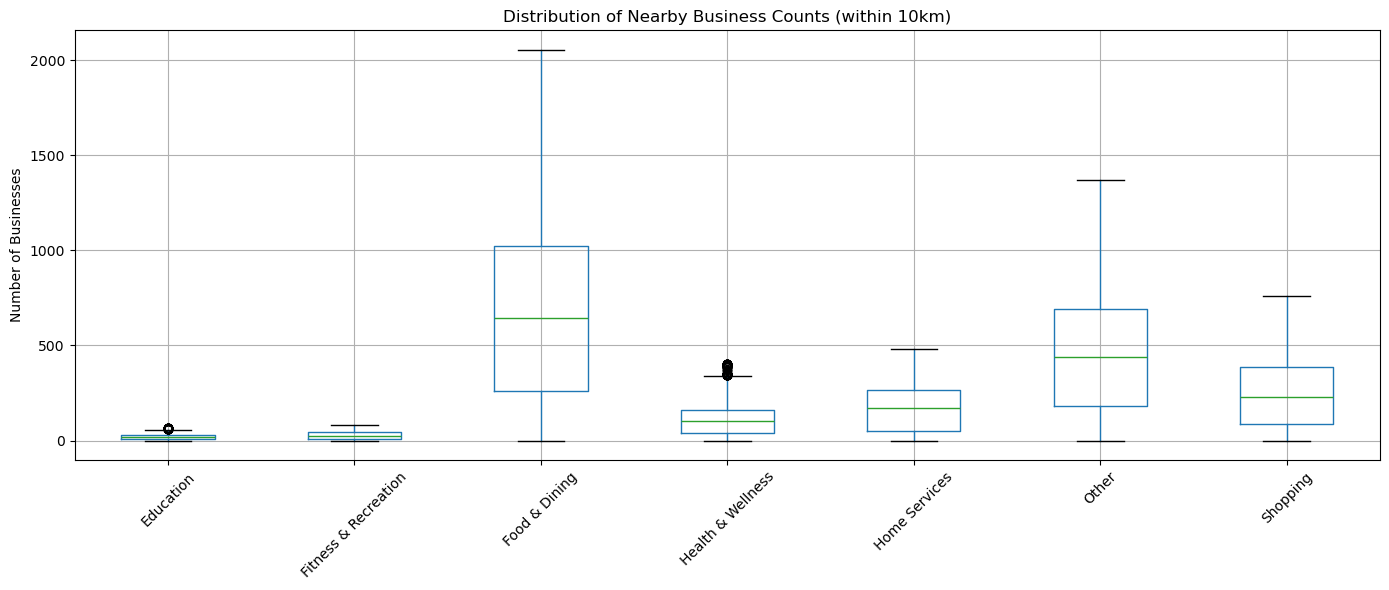

In [73]:
import matplotlib.pyplot as plt

# Pick any 7 general categories to visualize (you can customize this)
selected_categories = non_zero_df.columns[-7:]  # First 7 categories, or pick your own

# Create boxplots
plt.figure(figsize=(14, 6))
non_zero_df[selected_categories].boxplot()
plt.title("Distribution of Nearby Business Counts (within 10km)")
plt.ylabel("Number of Businesses")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

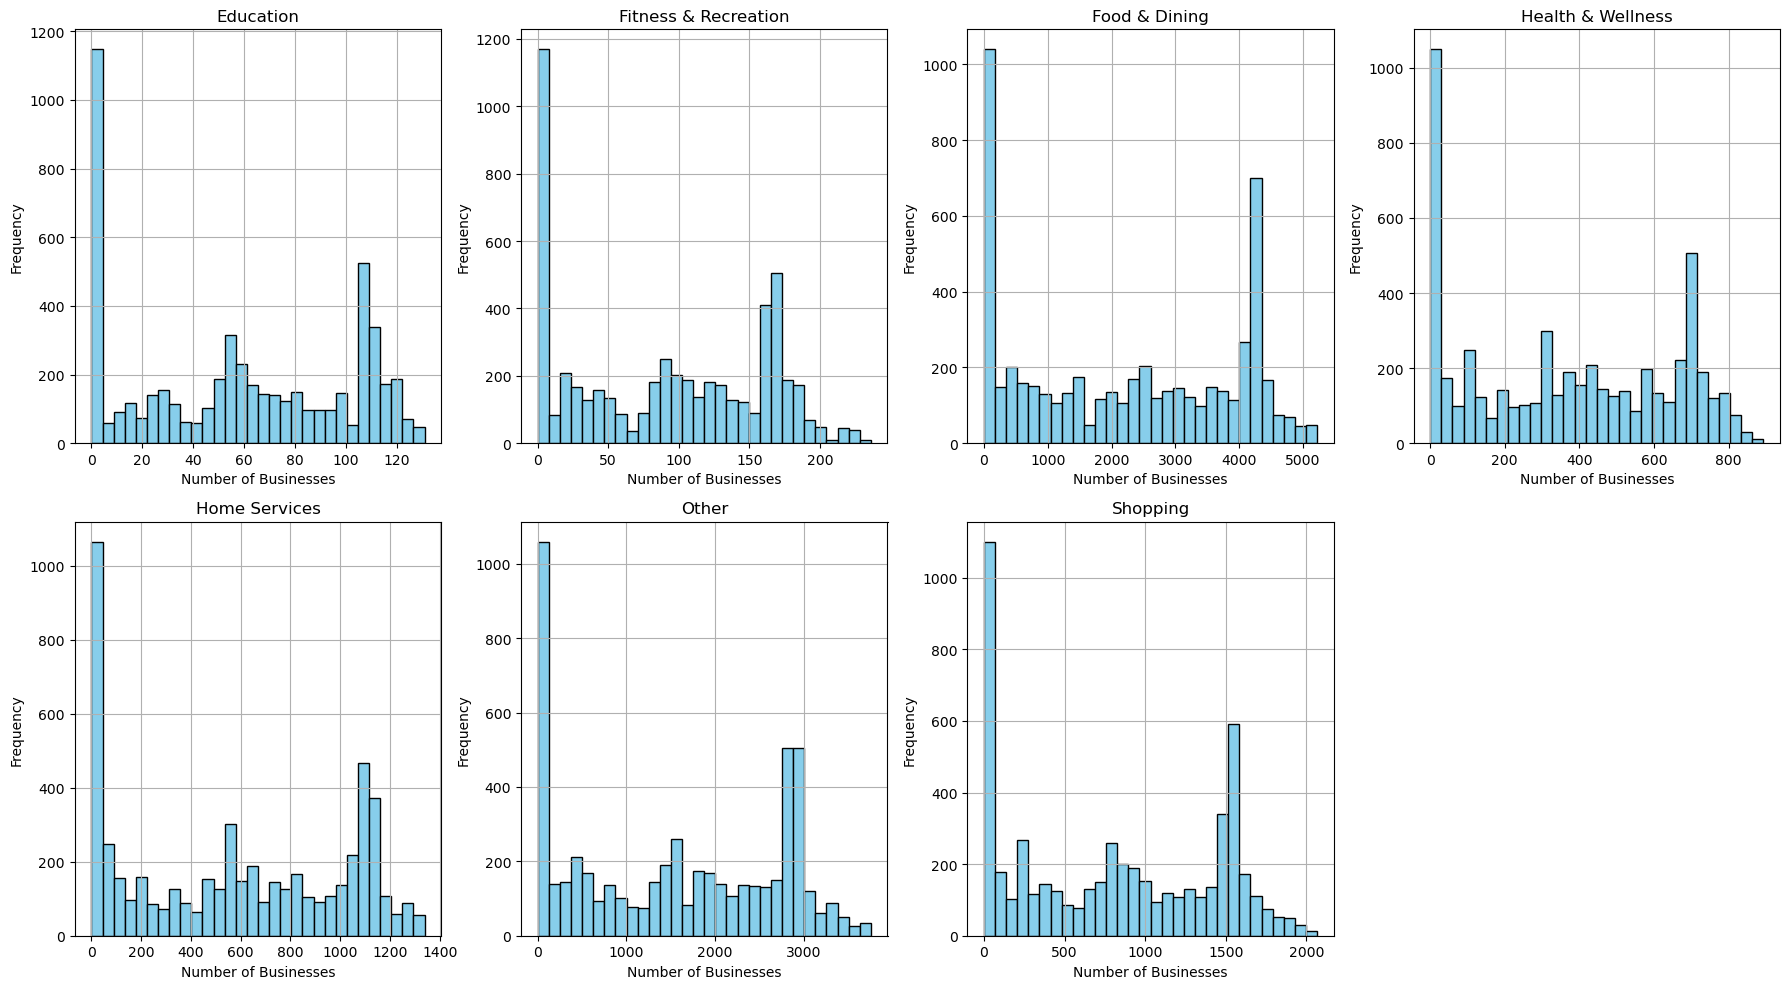

In [28]:
import matplotlib.pyplot as plt

# Select the last 7 category columns
last_7_columns = non_zero_df.iloc[:, -7:]

# Create histograms
plt.figure(figsize=(18, 10))

for i, col in enumerate(last_7_columns.columns):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns layout
    plt.hist(last_7_columns[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Number of Businesses')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree

# Drop missing lat/lon
rental_df = rental_df.dropna(subset=['LATITUDE', 'LONGITUDE'])
business_df = business_df.dropna(subset=['latitude', 'longitude'])

# Convert coordinates to radians (for BallTree)
rental_coords_rad = np.radians(rental_df[['LATITUDE', 'LONGITUDE']].values)
business_coords_rad = np.radians(business_df[['latitude', 'longitude']].values)

# Build BallTree on Yelp business coordinates
tree = BallTree(business_coords_rad, metric='haversine')

# Radius in radians (8 km)
radius_km = 8
radius_rad = radius_km / 6371.0  # Earth's radius in km

# Get all unique general categories
category_list = sorted(business_df['general_category'].dropna().unique())

# Create an empty DataFrame to store results
category_counts_df = pd.DataFrame(0, index=rental_df.index, columns=category_list)

# Loop through each rental
for i, coord in enumerate(rental_coords_rad):
    indices = tree.query_radius([coord], r=radius_rad)[0]
    nearby = business_df.iloc[indices]
    counts = nearby['general_category'].value_counts()
    category_counts_df.loc[rental_df.index[i], counts.index] = counts.values

# Final output: category_counts_df contains the number of businesses by category within 10km for each rental
category_counts_df.head()

,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [79]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989288 entries, 0 to 3989287
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   SCRAPED_TIMESTAMP    object 
 2   STATE                object 
 3   CITY                 object 
 4   NEIGHBORHOOD         object 
 5   ZIP                  float64
 6   ADDRESS              object 
 7   COMPANY              object 
 8   BUILDING_TYPE        object 
 9   BEDS                 float64
 10  BATHS                float64
 11  SQFT                 float64
 12  RENT_PRICE           float64
 13  GRANITE              object 
 14  STAINLESS            object 
 15  POOL                 object 
 16  GYM                  object 
 17  DOORMAN              object 
 18  FURNISHED            object 
 19  LAUNDRY              object 
 20  GARAGE               object 
 21  GARAGE_COUNT         float64
 22  CLUBHOUSE            object 
 23  LATITUDE             float64
 24

In [78]:
category_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989288 entries, 0 to 3989287
Data columns (total 7 columns):
 #   Column                Dtype
---  ------                -----
 0   Education             int64
 1   Fitness & Recreation  int64
 2   Food & Dining         int64
 3   Health & Wellness     int64
 4   Home Services         int64
 5   Other                 int64
 6   Shopping              int64
dtypes: int64(7)
memory usage: 213.1 MB


In [38]:
non_zero_df = category_counts_df[category_counts_df.iloc[:, 1:].sum(axis=1) > 0]

In [39]:
non_zero_df

,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
8,1,0,11,0,4,6,3
10,55,65,1780,315,469,1210,599
23,105,167,4269,724,1164,2912,1537
26,108,164,4212,690,1092,2851,1527
46,1,0,11,0,4,4,3
...,...,...,...,...,...,...,...
3989250,13,15,769,44,110,364,210
3989254,30,40,1593,118,220,836,459
3989256,31,42,1643,122,224,860,473
3989257,31,42,1635,121,224,856,471


In [80]:
# Concatenate the category_counts_df to the rental_df (assumes matching row order)
merged_df = pd.concat([rental_df, category_counts_df], axis=1)

# Filter out listings where all business counts are 0 (i.e., no businesses within the radius)
business_columns = category_counts_df.columns  # Get the business category columns
merged_df = merged_df[(merged_df[business_columns].sum(axis=1) > 0)]

# Now merged_df contains only rental listings with businesses nearby
print(merged_df)

                ID        SCRAPED_TIMESTAMP STATE              CITY  \
10       514905902  2025-01-21 20:56:00.769    FL             Tampa   
23       514875912  2025-01-21 20:12:30.897    FL             Tampa   
26       514829153  2025-01-21 19:11:39.364    FL             Tampa   
50       514851681  2025-01-21 19:37:43.755    FL  Saint Petersburg   
58       514887079  2025-01-21 20:27:48.726    FL             Largo   
...            ...                      ...   ...               ...   
3989250  514800705  2025-01-21 18:38:59.269    DE              Bear   
3989254  514800212  2025-01-21 18:38:32.687    DE        Wilmington   
3989256  514799886  2025-01-21 18:38:12.399    DE        Wilmington   
3989257  514800554  2025-01-21 18:38:54.443    DE        Wilmington   
3989258  514799994  2025-01-21 18:38:12.797    DE        Wilmington   

             NEIGHBORHOOD      ZIP                    ADDRESS COMPANY  \
10           West Meadows  33647.0        20433 Needletree Dr  Zillow   
2

In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286815 entries, 10 to 3989258
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    286815 non-null  int64  
 1   SCRAPED_TIMESTAMP     286815 non-null  object 
 2   STATE                 286815 non-null  object 
 3   CITY                  286815 non-null  object 
 4   NEIGHBORHOOD          82366 non-null   object 
 5   ZIP                   278462 non-null  float64
 6   ADDRESS               286815 non-null  object 
 7   COMPANY               269936 non-null  object 
 8   BUILDING_TYPE         286815 non-null  object 
 9   BEDS                  286815 non-null  float64
 10  BATHS                 286723 non-null  float64
 11  SQFT                  276842 non-null  float64
 12  RENT_PRICE            286815 non-null  float64
 13  GRANITE               286815 non-null  object 
 14  STAINLESS             286815 non-null  object 
 15  POO

In [88]:
merged_df.to_csv('rental_data_with_number_business.csv')

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Select the business category columns
business_columns = category_counts_df.columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the business category columns
normalized_df = category_counts_df.copy()
normalized_df[business_columns] = scaler.fit_transform(normalized_df[business_columns])

# Now `normalized_df` contains the normalized values, and the original `category_counts_df` remains unchanged.
print(normalized_df)

         Education  Fitness & Recreation  Food & Dining  Health & Wellness  \
0              0.0                   0.0            0.0                0.0   
1              0.0                   0.0            0.0                0.0   
2              0.0                   0.0            0.0                0.0   
3              0.0                   0.0            0.0                0.0   
4              0.0                   0.0            0.0                0.0   
...            ...                   ...            ...                ...   
3989283        0.0                   0.0            0.0                0.0   
3989284        0.0                   0.0            0.0                0.0   
3989285        0.0                   0.0            0.0                0.0   
3989286        0.0                   0.0            0.0                0.0   
3989287        0.0                   0.0            0.0                0.0   

         Home Services  Other  Shopping  
0                  0.

In [85]:
# Concatenate the category_counts_df to the rental_df (assumes matching row order)
merged_normalized_df = pd.concat([rental_df, normalized_df], axis=1)

# Filter out listings where all business counts are 0 (i.e., no businesses within the radius)
business_columns = category_counts_df.columns  # Get the business category columns
merged_normalized_df = merged_normalized_df[(merged_normalized_df[business_columns].sum(axis=1) > 0)]

# Now merged_df contains only rental listings with businesses nearby
print(merged_normalized_df)

                ID        SCRAPED_TIMESTAMP STATE              CITY  \
10       514905902  2025-01-21 20:56:00.769    FL             Tampa   
23       514875912  2025-01-21 20:12:30.897    FL             Tampa   
26       514829153  2025-01-21 19:11:39.364    FL             Tampa   
50       514851681  2025-01-21 19:37:43.755    FL  Saint Petersburg   
58       514887079  2025-01-21 20:27:48.726    FL             Largo   
...            ...                      ...   ...               ...   
3989250  514800705  2025-01-21 18:38:59.269    DE              Bear   
3989254  514800212  2025-01-21 18:38:32.687    DE        Wilmington   
3989256  514799886  2025-01-21 18:38:12.399    DE        Wilmington   
3989257  514800554  2025-01-21 18:38:54.443    DE        Wilmington   
3989258  514799994  2025-01-21 18:38:12.797    DE        Wilmington   

             NEIGHBORHOOD      ZIP                    ADDRESS COMPANY  \
10           West Meadows  33647.0        20433 Needletree Dr  Zillow   
2

In [86]:
merged_normalized_df.head()

,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,BEDS,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
10,514905902,2025-01-21 20:56:00.769,FL,Tampa,West Meadows,33647.0,20433 Needletree Dr,Zillow,house,2.0,...,2011.0,2025-01-15 00:00:00.0,available,0.134615,0.115044,0.065152,0.166381,0.071170,0.100244,0.092958
23,514875912,2025-01-21 20:12:30.897,FL,Tampa,Oakford Park,33609.0,110 N Tampania Ave UNIT A,Zillow,apartment building,2.0,...,NaN,2024-05-13 00:00:00.0,available,0.326923,0.349558,0.312121,0.524871,0.451146,0.421935,0.389859
26,514829153,2025-01-21 19:11:39.364,FL,Tampa,Downtown,33605.0,1720 Nuccio Pkwy,Zillow,apartment building,0.0,...,NaN,1970-01-01 00:00:00.0,available,0.256410,0.318584,0.282828,0.483705,0.433052,0.375480,0.363380
50,514851681,2025-01-21 19:37:43.755,FL,Saint Petersburg,Saint Petersburg,33711.0,4341 34th St S,Zillow,apartment building,2.0,...,NaN,2025-04-21 07:00:00.0,coming soon,0.205128,0.168142,0.181987,0.217839,0.176116,0.203982,0.175775
58,514887079,2025-01-21 20:27:48.726,FL,Largo,NaN,33773.0,12700 66th St,Zillow,apartment building,2.0,...,NaN,2025-02-24 08:00:00.0,coming soon,0.096154,0.185841,0.137037,0.234991,0.373945,0.235767,0.187606


In [87]:
merged_normalized_df.to_csv('rental_data_with_normalized_business.csv')

In [90]:
business_df.to_csv('business_data.csv')

In [3]:
df = pd.read_csv('rental_data_with_normalized_business.csv')

In [4]:
df.head()

,Unnamed: 0,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,10,514905902,2025-01-21 20:56:00.769,FL,Tampa,West Meadows,33647.0,20433 Needletree Dr,Zillow,house,...,2011.0,2025-01-15 00:00:00.0,available,0.134615,0.115044,0.065152,0.166381,0.071170,0.100244,0.092958
1,23,514875912,2025-01-21 20:12:30.897,FL,Tampa,Oakford Park,33609.0,110 N Tampania Ave UNIT A,Zillow,apartment building,...,NaN,2024-05-13 00:00:00.0,available,0.326923,0.349558,0.312121,0.524871,0.451146,0.421935,0.389859
2,26,514829153,2025-01-21 19:11:39.364,FL,Tampa,Downtown,33605.0,1720 Nuccio Pkwy,Zillow,apartment building,...,NaN,1970-01-01 00:00:00.0,available,0.256410,0.318584,0.282828,0.483705,0.433052,0.375480,0.363380
3,50,514851681,2025-01-21 19:37:43.755,FL,Saint Petersburg,Saint Petersburg,33711.0,4341 34th St S,Zillow,apartment building,...,NaN,2025-04-21 07:00:00.0,coming soon,0.205128,0.168142,0.181987,0.217839,0.176116,0.203982,0.175775
4,58,514887079,2025-01-21 20:27:48.726,FL,Largo,NaN,33773.0,12700 66th St,Zillow,apartment building,...,NaN,2025-02-24 08:00:00.0,coming soon,0.096154,0.185841,0.137037,0.234991,0.373945,0.235767,0.187606


In [12]:
df[(df['CITY'] == 'Tampa')]

,Unnamed: 0,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,10,514905902,2025-01-21 20:56:00.769,FL,Tampa,West Meadows,33647.0,20433 Needletree Dr,Zillow,house,...,2011.0,2025-01-15 00:00:00.0,available,0.134615,0.115044,0.065152,0.166381,0.071170,0.100244,0.092958
1,23,514875912,2025-01-21 20:12:30.897,FL,Tampa,Oakford Park,33609.0,110 N Tampania Ave UNIT A,Zillow,apartment building,...,NaN,2024-05-13 00:00:00.0,available,0.326923,0.349558,0.312121,0.524871,0.451146,0.421935,0.389859
2,26,514829153,2025-01-21 19:11:39.364,FL,Tampa,Downtown,33605.0,1720 Nuccio Pkwy,Zillow,apartment building,...,NaN,1970-01-01 00:00:00.0,available,0.256410,0.318584,0.282828,0.483705,0.433052,0.375480,0.363380
10,80,514821747,2025-01-21 19:02:58.675,FL,Tampa,Carver City,33607.0,2202 N Lois Ave,Zillow,apartment building,...,NaN,2025-02-03 08:00:00.0,coming soon,0.339744,0.358407,0.340404,0.567753,0.507841,0.460356,0.420282
13,89,514829300,2025-01-21 19:11:39.971,FL,Tampa,Downtown,33605.0,1720 Nuccio Pkwy,Zillow,apartment building,...,NaN,1970-01-01 00:00:00.0,available,0.256410,0.318584,0.282828,0.483705,0.433052,0.375480,0.363380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286797,3905011,514821719,2025-01-21 19:02:58.527,FL,Tampa,Carver City,33607.0,2202 N Lois Ave,Zillow,apartment building,...,NaN,2025-02-17 08:00:00.0,coming soon,0.339744,0.358407,0.340404,0.567753,0.507841,0.460356,0.420282
286799,3905065,514853698,2025-01-21 19:40:34.788,FL,Tampa,NaN,33615.0,5902 Memorial Hwy,Zillow,apartment building,...,NaN,2025-03-30 07:00:00.0,coming soon,0.147436,0.141593,0.137037,0.190395,0.276236,0.224939,0.210704
286800,3905094,514839853,2025-01-21 19:24:14.302,FL,Tampa,NaN,33619.0,8403 Libby Ln,Zillow,unknown,...,NaN,2024-12-24 00:00:00.0,available,0.076923,0.092920,0.091414,0.181818,0.247286,0.152288,0.142535
286801,3905101,514866174,2025-01-21 19:56:53.438,FL,Tampa,NaN,33617.0,5507 Pokeweed Ct #A,Zillow,house,...,NaN,2025-01-05 00:00:00.0,available,0.102564,0.070796,0.155387,0.135506,0.312425,0.186168,0.138028


In [14]:
df['STATE'].value_counts()

STATE
FL    68215
TN    51036
IN    44852
PA    44230
MO    27002
AZ    16840
ID     9407
NJ     6455
LA     6049
DE     4714
NV     3456
CA     1690
IL     1518
MN     1268
MD       40
VT       22
CT       21
Name: count, dtype: int64

In [40]:
business_df['state'].value_counts()

state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

In [41]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       150346 non-null  object 
 1   name              150346 non-null  object 
 2   address           150346 non-null  object 
 3   city              150346 non-null  object 
 4   state             150346 non-null  object 
 5   postal_code       150346 non-null  object 
 6   latitude          150346 non-null  float64
 7   longitude         150346 non-null  float64
 8   stars             150346 non-null  float64
 9   review_count      150346 non-null  int64  
 10  is_open           150346 non-null  int64  
 11  attributes        136602 non-null  object 
 12  categories        150243 non-null  object 
 13  hours             127123 non-null  object 
 14  general_category  150346 non-null  object 
 15  lat_rad           150346 non-null  float64
 16  lon_rad           15

In [46]:
df['CITY'].value_counts().head(20)

CITY
Nashville           30946
Philadelphia        29217
Indianapolis        26159
Tampa               17575
Tucson              14565
Saint Louis          8716
Florissant           5939
New Orleans          4630
St. Louis            4483
Saint Petersburg     4340
Boise                3986
Port Richey          3690
Franklin             3569
Riverview            3503
Wesley Chapel        3160
Antioch              3153
Noblesville          3094
Greenwood            3022
Clearwater           2997
New Port Richey      2948
Name: count, dtype: int64

In [57]:
Philly = df[(df['CITY'] == 'Philadelphia')]
Philly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29217 entries, 79853 to 124078
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            29217 non-null  int64  
 1   ID                    29217 non-null  int64  
 2   SCRAPED_TIMESTAMP     29217 non-null  object 
 3   STATE                 29217 non-null  object 
 4   CITY                  29217 non-null  object 
 5   NEIGHBORHOOD          29140 non-null  object 
 6   ZIP                   29192 non-null  float64
 7   ADDRESS               29217 non-null  object 
 8   COMPANY               26700 non-null  object 
 9   BUILDING_TYPE         29217 non-null  object 
 10  BEDS                  29217 non-null  float64
 11  BATHS                 29180 non-null  float64
 12  SQFT                  25588 non-null  float64
 13  RENT_PRICE            29217 non-null  float64
 14  GRANITE               29217 non-null  object 
 15  STAINLESS          

In [58]:
Philly.to_csv('Philadelphia.csv')

In [53]:
merged_df22 = pd.concat([rental_df, category_counts_df], axis=1)

In [54]:
merged_df22.head()

,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,BEDS,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,514883006,2025-01-21 20:22:16.024,FL,Sarasota,NaN,34240.0,5671 Mauna Loa Blvd,Zillow,apartment building,2.0,...,NaN,2025-02-14 08:00:00.0,coming soon,0,0,0,0,0,0,0
1,514915890,2025-01-21 21:16:17.438,FL,North Miami Beach,NaN,33160.0,3301 NE 183rd St,Zillow,apartment building,2.0,...,NaN,1970-01-01 00:00:00.0,available,0,0,0,0,0,0,0
2,514922818,2025-01-21 21:28:40.894,FL,Middleburg,NaN,32068.0,4598 Calendula Ave,Zillow,unknown,3.0,...,2016.0,2024-09-30 00:00:00.0,available,0,0,0,0,0,0,0
3,514523097,2025-01-21 01:43:25.904,FL,Jacksonville,Lake Forest Hills,32208.0,8214 Merivale Road,Renu Management,house,3.0,...,NaN,2021-07-26 00:00:00.0,unavailable,0,0,0,0,0,0,0
4,514512849,2025-01-21 01:18:03.805,FL,Groveland,NaN,34736.0,143 Prairie Falcon Drive,Hudson Homes,house,3.0,...,NaN,2022-02-02 00:00:00.0,unavailable,0,0,0,0,0,0,0


In [55]:
merged_df22['CITY'].value_counts().head(20)

CITY
Houston         90326
Austin          74533
Dallas          61938
Charlotte       61420
Los Angeles     58066
Denver          55798
San Antonio     54542
Phoenix         51936
Atlanta         47105
Jacksonville    42030
Seattle         36047
Chicago         32120
Fort Worth      32098
Nashville       31014
San Diego       30977
Philadelphia    29220
Washington      29122
Indianapolis    26159
Cincinnati      24922
Las Vegas       24467
Name: count, dtype: int64

In [ ]:
merged_df22[(merged_df22['CITY'] == 'Philadelphia')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 29220 entries, 941547 to 1079960
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    29220 non-null  int64  
 1   SCRAPED_TIMESTAMP     29220 non-null  object 
 2   STATE                 29220 non-null  object 
 3   CITY                  29220 non-null  object 
 4   NEIGHBORHOOD          29140 non-null  object 
 5   ZIP                   29195 non-null  float64
 6   ADDRESS               29220 non-null  object 
 7   COMPANY               26703 non-null  object 
 8   BUILDING_TYPE         29220 non-null  object 
 9   BEDS                  29220 non-null  float64
 10  BATHS                 29183 non-null  float64
 11  SQFT                  25591 non-null  float64
 12  RENT_PRICE            29220 non-null  float64
 13  GRANITE               29220 non-null  object 
 14  STAINLESS             29220 non-null  object 
 15  POOL             

In [3]:
import pandas as pd
import numpy as np

In [ ]:
NumPhilly = pd.read_csv('rental_data_with_number_business.csv')

In [5]:
NumPhilly.head()

,Unnamed: 0,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
0,10,514905902,2025-01-21 20:56:00.769,FL,Tampa,West Meadows,33647.0,20433 Needletree Dr,Zillow,house,...,2011.0,2025-01-15 00:00:00.0,available,21,26,387,97,59,287,165
1,23,514875912,2025-01-21 20:12:30.897,FL,Tampa,Oakford Park,33609.0,110 N Tampania Ave UNIT A,Zillow,apartment building,...,NaN,2024-05-13 00:00:00.0,available,51,79,1854,306,374,1208,692
2,26,514829153,2025-01-21 19:11:39.364,FL,Tampa,Downtown,33605.0,1720 Nuccio Pkwy,Zillow,apartment building,...,NaN,1970-01-01 00:00:00.0,available,40,72,1680,282,359,1075,645
3,50,514851681,2025-01-21 19:37:43.755,FL,Saint Petersburg,Saint Petersburg,33711.0,4341 34th St S,Zillow,apartment building,...,NaN,2025-04-21 07:00:00.0,coming soon,32,38,1081,127,146,584,312
4,58,514887079,2025-01-21 20:27:48.726,FL,Largo,NaN,33773.0,12700 66th St,Zillow,apartment building,...,NaN,2025-02-24 08:00:00.0,coming soon,15,42,814,137,310,675,333


In [6]:
NumPhilly = NumPhilly[(NumPhilly['CITY'] == 'Philadelphia')]
NumPhilly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29217 entries, 79853 to 124078
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            29217 non-null  int64  
 1   ID                    29217 non-null  int64  
 2   SCRAPED_TIMESTAMP     29217 non-null  object 
 3   STATE                 29217 non-null  object 
 4   CITY                  29217 non-null  object 
 5   NEIGHBORHOOD          29140 non-null  object 
 6   ZIP                   29192 non-null  float64
 7   ADDRESS               29217 non-null  object 
 8   COMPANY               26700 non-null  object 
 9   BUILDING_TYPE         29217 non-null  object 
 10  BEDS                  29217 non-null  float64
 11  BATHS                 29180 non-null  float64
 12  SQFT                  25588 non-null  float64
 13  RENT_PRICE            29217 non-null  float64
 14  GRANITE               29217 non-null  object 
 15  STAINLESS          

In [7]:
NumPhilly.head()

,Unnamed: 0,ID,SCRAPED_TIMESTAMP,STATE,CITY,NEIGHBORHOOD,ZIP,ADDRESS,COMPANY,BUILDING_TYPE,...,YEAR_BUILT,AVAILABLE_AT,AVAILABILITY_STATUS,Education,Fitness & Recreation,Food & Dining,Health & Wellness,Home Services,Other,Shopping
79853,941547,511041274,2025-01-01 10:51:51.870,PA,Philadelphia,Fishtown - Lower Kensington,19125.0,1242 Frankford Ave,NaN,house,...,NaN,2025-01-01 10:51:51.866,available,143,204,5502,493,779,2539,1586
79855,941562,511201881,2025-01-01 15:54:20.919,PA,Philadelphia,Logan Square,19130.0,"1600 Callowhill Street , Philadelphia, PA 19130",Greystar,apartment building,...,NaN,2025-01-01 15:54:16.763,available,139,210,5514,523,749,2607,1601
79857,941568,510968716,2025-01-01 05:24:47.768,PA,Philadelphia,Logan Square,19130.0,"1500 Hamilton Street , Philadelphia, PA 19130",Greystar,apartment building,...,NaN,2025-01-01 05:24:26.562,available,139,210,5494,524,754,2594,1598
79877,941768,511131560,2025-01-01 13:35:45.171,PA,Philadelphia,East Kensington,19125.0,"1999 Boston Street , Philadelphia, PA 19125",Greystar,apartment building,...,NaN,2025-01-01 13:35:25.912,available,144,198,5369,503,758,2472,1544
79883,941806,511041272,2025-01-01 10:51:51.391,PA,Philadelphia,Washington Square West,19147.0,1120 Rodman St #3,JG Real Estate Brielle Ballantine https://www....,apartment building,...,NaN,2025-01-01 10:51:51.387,available,134,204,5327,483,706,2504,1532


In [8]:
NumPhilly.to_csv('Philadelphia_Numbers.csv')